In [1]:
from collections import defaultdict

def parseData(fname):
    for l in open(fname):
        yield eval(l)

## First, we explore the (user, items) list

In [2]:
print("Reading data...")
data_users_items = list(parseData("./australian_users_items.json"))
print("Done.")

Reading data...
Done.


In [3]:
print(data_users_items[0])

{'user_id': '76561197970982479', 'items_count': 277, 'steam_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', '

The number of entries within this dataset is:  88310
The number of users within this dataset is:  87626
The number of items(games) within this dataset is:  10978
The average number of games purchased by all users is 58.1343665122224


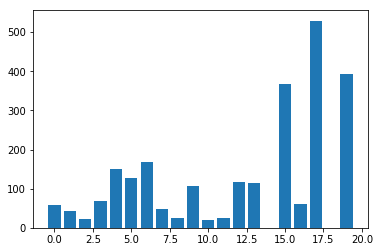

In [17]:
import matplotlib.pyplot as plt

users = set()
items = set()
user_items = defaultdict(lambda: [])
user_playtime_ovarall = defaultdict(int)
user_playtime_averge = defaultdict(int)
user_item_playtime = defaultdict(int)

for entry in data_users_items:
    u, i = entry['user_id'], entry['items']
    for item in i:
        items.add((item['item_id'], item['item_name']))
    users.add(u)
    user_items[u] = i

users = list(users)
items = list(items)
items.sort() 
users.sort()

print('The number of entries within this dataset is: ', len(data_users_items))
print('The number of users within this dataset is: ', len(users))
print('The number of items(games) within this dataset is: ', len(items))

# for each user, num. of games owned 
# X = list(users)[:100]
X = range(20)
Y = [len(user_items[u]) for u in users][:20]
plt.bar(X, Y)

# average num. of games owned
total = 0
for u in users:
    total += len(user_items[u])

average = float(total) / len(users)
print('The average number of games purchased by all users is', average)

# each user, overall/average time played all games combined
for u in users:
    overall = 0
    
    for i in user_items[u]:
        time = i['playtime_forever']
        overall += time
        # each user, individual time played for each game
        user_item_playtime[(u, i['item_id'])] = time
        
    user_playtime_ovarall[u] = overall
    if len(user_items[u]):
        user_playtime_averge[u] = float(overall) / len(user_items[u])

<BarContainer object of 20 artists>

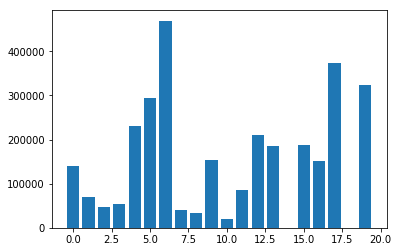

In [15]:
# overall time plot
Y = [user_playtime_ovarall[u] for u in users][:20]
plt.bar(X, Y)
    

<BarContainer object of 20 artists>

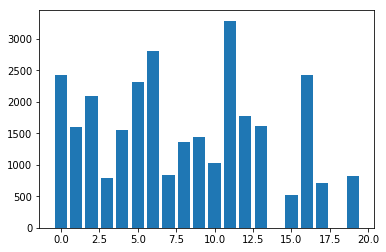

In [16]:
# average time plot
Y = [user_playtime_averge[u] for u in users][:20]
plt.bar(X, Y)

In [7]:
# each game, overall time played by different users
# each game, average time played by different users
# famous games, overall playtime 饼图

## Then, we explore the (user, reviews) list

In [8]:
print("Reading data...")
data_user_reviews = list(parseData("./australian_user_reviews.json"))
print("Done.") 

Reading data...
Done.


In [9]:
print(data_user_reviews[1])

{'user_id': 'js41637', 'user_url': 'http://steamcommunity.com/id/js41637', 'reviews': [{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it\'s title, this is easily one of my GOTYs. You don\'t get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can\'t 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}, {'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', 'recomm